#**8. Introduction to Machine Learning**

# ***EXAMPLE 1***

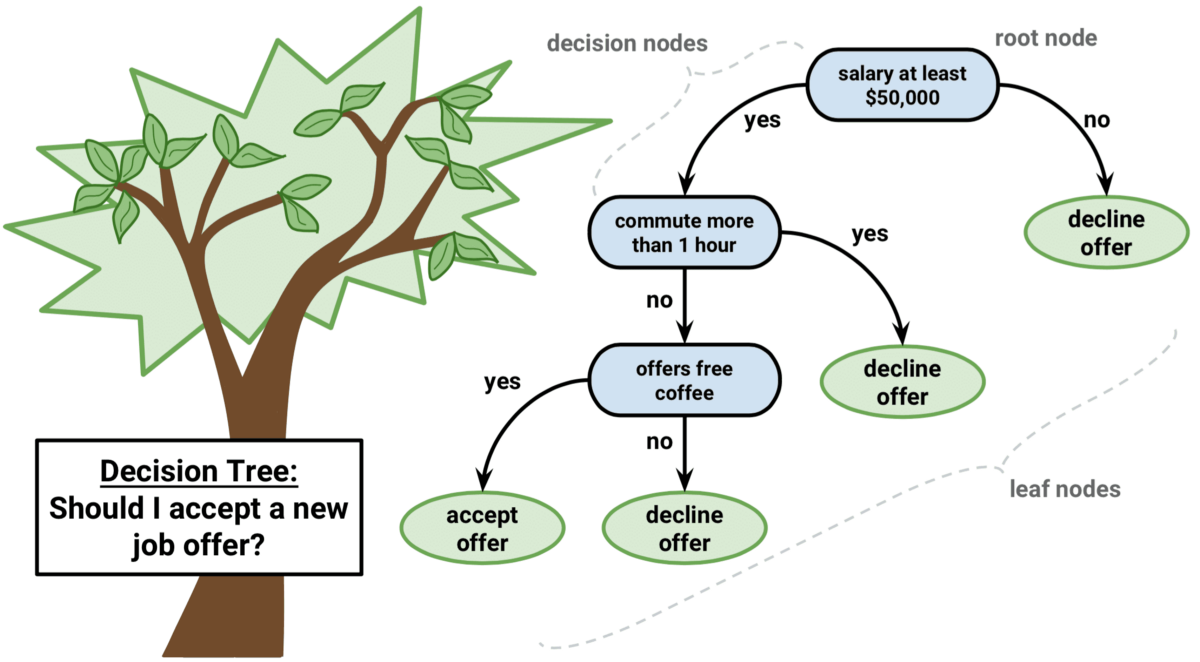

A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In the example, the dataset shows the information about people who underwent Covid 19 vaccination. The aim of the analysis is to study the characteristics of the people and their health condition after undergoing vaccination. 

# **Step 1: Import the modules you need, and read the dataset with pandas:**

In [ ]:
import pandas as pd

from sklearn import tree

import pydotplus

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

import matplotlib.image as pltimg

In [ ]:
df = pd.read_csv("covid.csv")

print(df)

    Age  BMI  Gender      Vaccine  Trials  Country    Health
0    36   23    Male       Pfizer       4  GERMANY    Normal
1    42   29  Female       Pfizer       4  GERMANY  Abnormal
2    28   24    Male      Sinovac       4    CHINA    Normal
3    52   26    Male       Pfizer       4  GERMANY    Normal
4    43   22  Female       Pfizer       4  GERMANY    Normal
5    44   19  Female      Sinovac       4    CHINA    Normal
6    66   28  Female  AstraZeneca       1       UK  Abnormal
7    35   24  Female  AstraZeneca       1       UK  Abnormal
8    52   25    Male  AstraZeneca       1       UK  Abnormal
9    35   19    Male  AstraZeneca       1       UK    Normal
10   28   21  Female       Pfizer       4  GERMANY  Abnormal
11   29   20  Female      Sinovac       4    CHINA    Normal
12   45   23  Female      Sinovac       4    CHINA    Normal


# **Step 2: Describe the variables**

In [ ]:
#calculate mean

import numpy as np

x = np.mean(df.Age)
print(x)


41.15384615384615


In [ ]:
#calculate median

y = np.median(df.Age)
print(y)

42.0


In [ ]:
#calculate standard deviation

z = np.std(df.Age)
print(z)

10.654332118880484


#**Step 3: Data pre-processing**

In [ ]:
print(df)



    Age  BMI  Gender      Vaccine  Trials  Country    Health
0    36   23    Male       Pfizer       4  GERMANY    Normal
1    42   29  Female       Pfizer       4  GERMANY  Abnormal
2    28   24    Male      Sinovac       4    CHINA    Normal
3    52   26    Male       Pfizer       4  GERMANY    Normal
4    43   22  Female       Pfizer       4  GERMANY    Normal
5    44   19  Female      Sinovac       4    CHINA    Normal
6    66   28  Female  AstraZeneca       1       UK  Abnormal
7    35   24  Female  AstraZeneca       1       UK  Abnormal
8    52   25    Male  AstraZeneca       1       UK  Abnormal
9    35   19    Male  AstraZeneca       1       UK    Normal
10   28   21  Female       Pfizer       4  GERMANY  Abnormal
11   29   20  Female      Sinovac       4    CHINA    Normal
12   45   23  Female      Sinovac       4    CHINA    Normal


In [ ]:
#Health
d = {'Normal': 1, 'Abnormal': 0}
df['Health'] = df['Health'].map(d)

#Gender
d = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(d)

#Country
d = {'GERMANY': 1, 'CHINA': 2, 'UK': 3}
df['Country'] = df['Country'].map(d)

#Vaccine
d = {'Pfizer': 1, 'Sinovac': 2, 'AstraZeneca': 3}
df['Vaccine'] = df['Vaccine'].map(d)

print(df)

    Age  BMI  Gender  Vaccine  Trials  Country  Health
0    36   23       1        1       4        1       1
1    42   29       2        1       4        1       0
2    28   24       1        2       4        2       1
3    52   26       1        1       4        1       1
4    43   22       2        1       4        1       1
5    44   19       2        2       4        2       1
6    66   28       2        3       1        3       0
7    35   24       2        3       1        3       0
8    52   25       1        3       1        3       0
9    35   19       1        3       1        3       1
10   28   21       2        1       4        1       0
11   29   20       2        2       4        2       1
12   45   23       2        2       4        2       1


TOTAL SAMPLES = 13
NORMAL (1) = 8
ABNORMAL (0) = 5

#**Step 4: Separate the feature columns (input variables) from the target column.**

The feature columns are the columns that we try to predict from, and the target column is the column with the values we try to predict.

In [ ]:
features = ['Age', 'BMI', 'Gender', 'Vaccine', 'Trials', 'Country']

X = df[features] #input
y = df['Health'] #target

print(X)
print(y)

    Age  BMI  Gender  Vaccine  Trials  Country
0    36   23       1        1       4        1
1    42   29       2        1       4        1
2    28   24       1        2       4        2
3    52   26       1        1       4        1
4    43   22       2        1       4        1
5    44   19       2        2       4        2
6    66   28       2        3       1        3
7    35   24       2        3       1        3
8    52   25       1        3       1        3
9    35   19       1        3       1        3
10   28   21       2        1       4        1
11   29   20       2        2       4        2
12   45   23       2        2       4        2
0     1
1     0
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     1
10    0
11    1
12    1
Name: Health, dtype: int64


In [ ]:
print (X)

In [ ]:
print(y)

#**Step 5: Create Decision Tree**

Now we can create the actual decision tree, fit it with our details, and save a .png file on the computer:

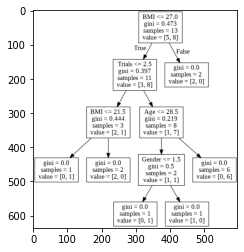

In [ ]:
#Load the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#Fit the features and target variable
dtree = dtree.fit(X, y)

#Analyse the data and plot decision tree
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)

#Plot the decision tree using pydotplus function
graph = pydotplus.graph_from_dot_data(data)

#Specify a name to the plot
graph.write_png('mydecisiontree.png')

#Export the plot and show 
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

Condition 1: 

BMI <=27.0 AND 
Trials <=2.5 (TRUE) AND
BMI <-21.5 (TRUE) 
HEALTH CONDITION (ABNORMAL)

# **Interpretation of decision tree**

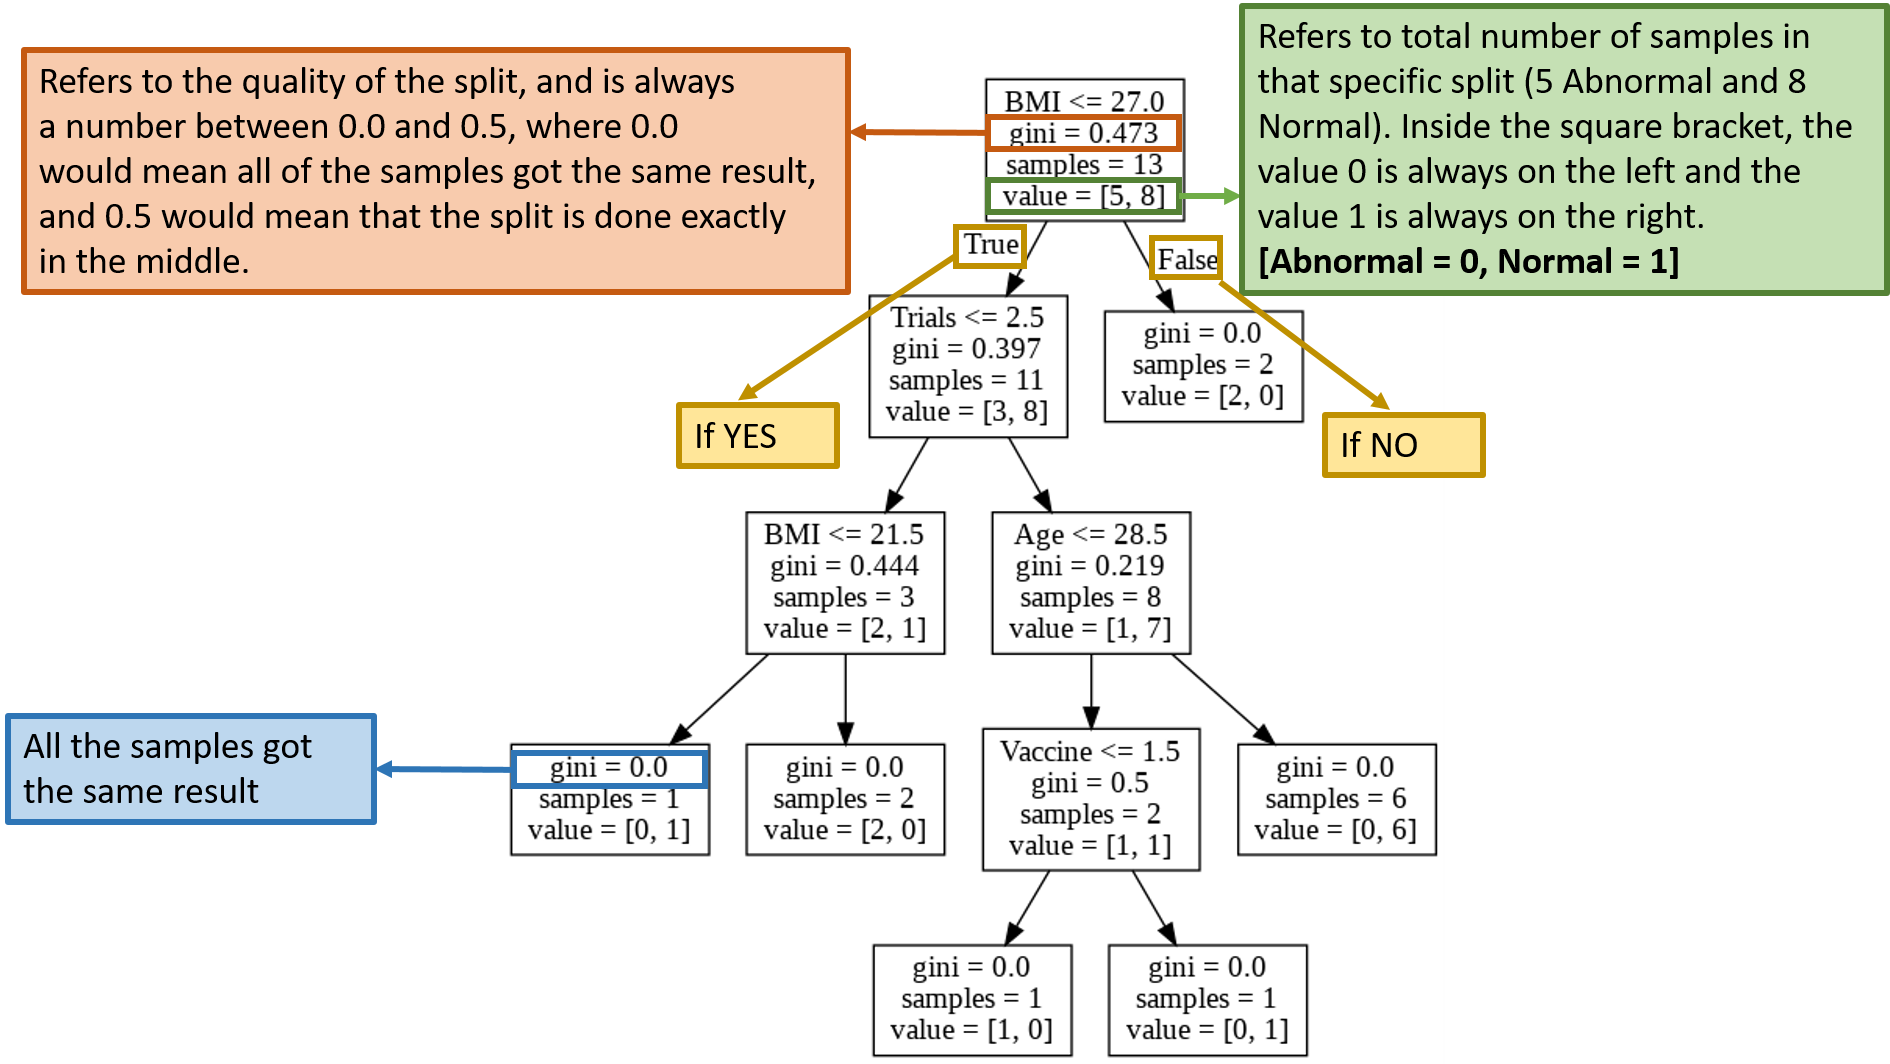

#**Step 6: Make predictions**

In [ ]:
print(df)

    Age  BMI  Gender  Vaccine  Trials  Country  Health
0    36   23       1        1       4        1       1
1    42   29       2        1       4        1       0
2    28   24       1        2       4        2       1
3    52   26       1        1       4        1       1
4    43   22       2        1       4        1       1
5    44   19       2        2       4        2       1
6    66   28       2        3       1        3       0
7    35   24       2        3       1        3       0
8    52   25       1        3       1        3       0
9    35   19       1        3       1        3       1
10   28   21       2        1       4        1       0
11   29   20       2        2       4        2       1
12   45   23       2        2       4        2       1


In [ ]:
#predict the outcome for future (knowledge extraction)

print(dtree.predict([[23, 21, 1, 1, 4, 1]]))

[0]
